In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

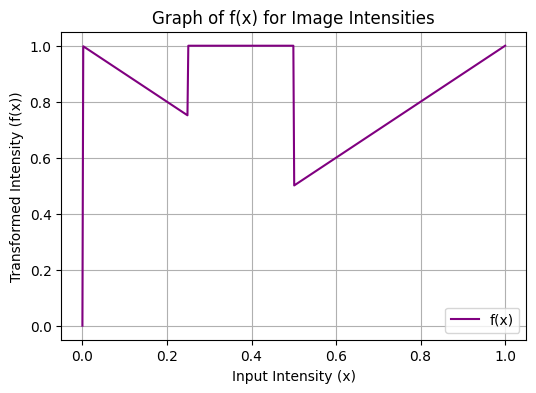

In [2]:
def f(x):
    if 0 < x <= 0.25:
        return 1 - x
    elif 0.25 < x <= 0.5:
        return 1
    else:
        return x

x_values = np.linspace(0, 1, 500)
f_values = [f(x) for x in x_values]

plt.figure(figsize=(6, 4))
plt.plot(x_values, f_values, label='f(x)', color='purple')
plt.title("Graph of f(x) for Image Intensities")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Transformed Intensity (f(x))")
plt.grid(True)
plt.legend()
plt.show()

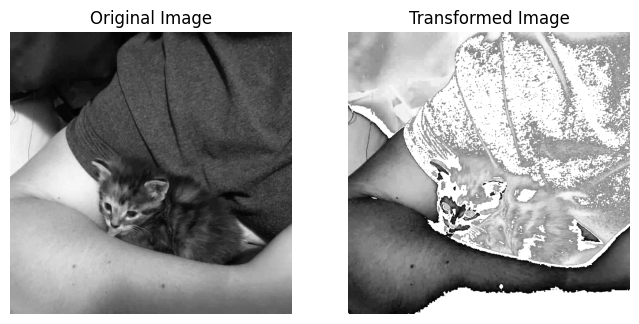

In [3]:
def apply(image):
     image = image / 255.0
     transformed_image = np.zeros_like(image)
     transformed_image[image <= 0.25] = 1 - image[image <= 0.25]
     transformed_image[(image > 0.25) & (image <= 0.5)] = 1
     transformed_image[image > 0.5] = image[image > 0.5]
     return (transformed_image * 255).astype(np.uint8)

image = cv2.imread("mlem.jpeg", cv2.IMREAD_GRAYSCALE)
transformed_image = apply(image)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()


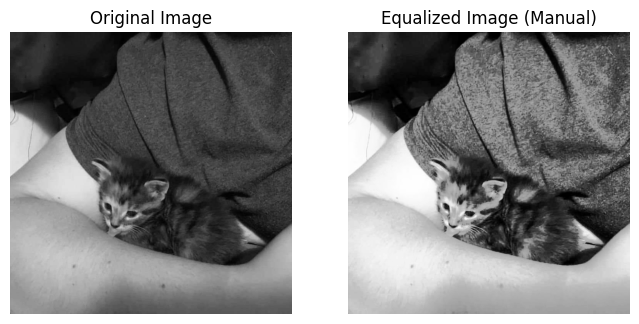

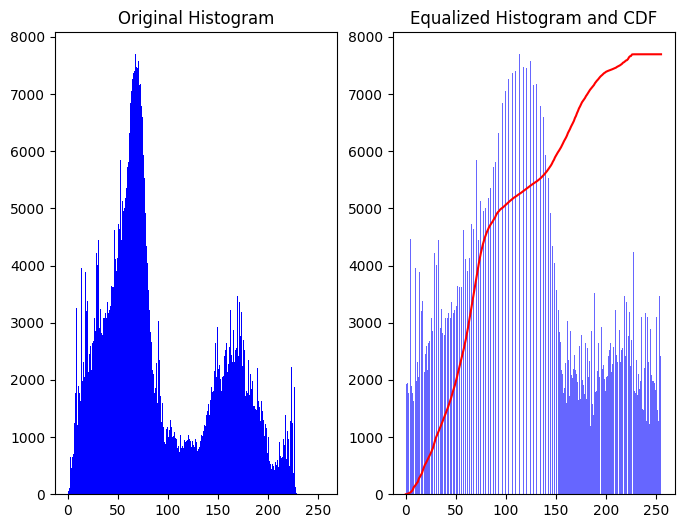

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize for visualization
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize to [0, 255]
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')  # Replace masked values with 0
    equalized_image = cdf_final[image]
    return equalized_image, hist, cdf_normalized

image = cv2.imread('mlem.jpeg', cv2.IMREAD_GRAYSCALE)
equalized_image, hist, cdf_normalized = histogram_equalization(image)



plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized Image (Manual)")
plt.axis('off')

plt.show()

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.hist(image.flatten(), 256, [0, 256], color='blue')
plt.title("Original Histogram")

plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='red')
plt.hist(equalized_image.flatten(), 256, [0, 256], color='blue', alpha=0.6)
plt.title("Equalized Histogram and CDF")
plt.show()


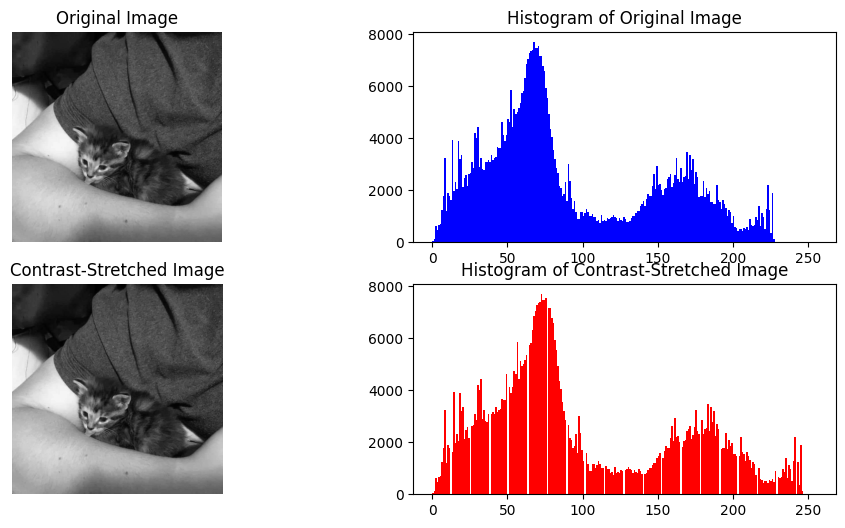

In [8]:
def contrastStretch(image):
    image = image.astype(np.float32)
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255
    stretched_image = stretched_image.astype(np.uint8)
    return stretched_image
image = cv2.imread('mlem.jpeg', cv2.IMREAD_GRAYSCALE)
new_image = contrastStretch(image)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.hist(image.flatten(), 256, [0, 256], color='blue')
plt.title("Histogram of Original Image")
plt.subplot(2, 2, 3)
plt.imshow(new_image, cmap='gray')
plt.title("Contrast-Stretched Image")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.hist(new_image.flatten(), 256, [0, 256], color='red')
plt.title("Histogram of Contrast-Stretched Image")
plt.show()

